Predictive Modelling

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#Importing neccesary libraries
data = pd.read_csv("Customer Segmentation.csv")
data.head()

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,1,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,2,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,3,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,4,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D


#Dropping the null values

In [5]:
data.dropna(inplace=True)

#Dropping uncessary columns

In [6]:
data.drop('Unnamed: 0',axis=1,inplace = True)

In [7]:
data.drop('ID',axis=1,inplace = True)

In [8]:
data.drop('Var_1',axis=1,inplace=True)

#Predictive Modelling

In [9]:
#Importing neccesary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
#Encoding the categorical data into numerical format
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [11]:
#Encode target variable 'Segmentation'
le = LabelEncoder()
data_encoded['Segmentation_Label'] = le.fit_transform(data['Segmentation'])

# Optional: view label mapping
print("Segmentation Encoding:", dict(zip(le.classes_, le.transform(le.classes_))))

Segmentation Encoding: {'A': 0, 'B': 1, 'C': 2, 'D': 3}


In [12]:
# Define feature columns (exclude non-numeric or already encoded columns)
features = [col for col in data_encoded.columns 
            if col not in ['Segmentation', 'Segmentation_Label', 'Spending_Score', 'Spending_Score_Encoded', 'Age_Group']]

X = data_encoded[features]
y = data_encoded['Segmentation_Label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
# Train Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ",acc_score)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy:  0.4574829931972789
Classification Report:
               precision    recall  f1-score   support

           A       0.41      0.46      0.43       482
           B       0.36      0.12      0.18       398
           C       0.41      0.58      0.48       399
           D       0.59      0.63      0.61       485

    accuracy                           0.46      1764
   macro avg       0.44      0.45      0.42      1764
weighted avg       0.45      0.46      0.43      1764



C:\Users\Nikita\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


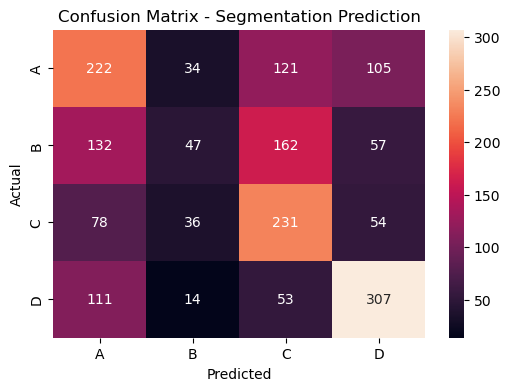

In [14]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='rocket')
plt.title("Confusion Matrix - Segmentation Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
# Sample new customer (replace with actual values)
new_customer = pd.DataFrame([{
    'Age': 35,
    'Work_Experience': 10,
    'Family_Size': 3,
    'Gender_Male': 1,
    'Ever_Married_Yes': 1,
    'Graduated_Yes': 1,
    'Profession_Doctor': 0,
    'Profession_Engineer': 1,
    'Profession_Healthcare': 0,
    'Profession_Homemaker': 0,
    'Profession_Lawyer': 0,
    'Profession_Marketing': 0
}])

# Match feature order
new_customer = new_customer.reindex(columns=features, fill_value=0)

# Scale
new_customer_scaled = scaler.transform(new_customer)

# Predict
predicted_class = model.predict(new_customer_scaled)
predicted_label = le.inverse_transform(predicted_class)

print("Predicted Segmentation Class:", predicted_label[0])


Predicted Segmentation Class: A
